In [8]:
#importando bibliotecas necessarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#trazendo nosso csv para um dataframe do pandas
dados_df = pd.read_csv('dados_climaticos.csv', sep=';', encoding='utf-8', low_memory = False)

In [10]:
#tratamento de dados -> necesario para o python endenda o que esta os
#tipos de dados que iremos utilizar
#display(dados_df)
dados_df['Data'] = pd.to_datetime(dados_df['Data'], dayfirst=True, errors='coerce')
display(dados_df)

,Data,Hora (UTC),Temp. Ins. (C),Temp. Max. (C),Temp. Min. (C),Umi. Ins. (%),Umi. Max. (%),Umi. Min. (%),Pto Orvalho Ins. (C),Pto Orvalho Max. (C),Pto Orvalho Min. (C),Pressao Ins. (hPa),Pressao Max. (hPa),Pressao Min. (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Raj. Vento (m/s),Radiacao (KJ/m²),Chuva (mm)
0,2025-02-06,0,"21,5","24,0","21,5","70,0","72,0","64,0","15,8","17,5","15,7","885,9","886,0","885,4","1,2","27,0","4,4",NaN,"0,0"
1,2025-02-06,100,"19,6","21,5","18,9","83,0","86,0","69,0","16,5","17,0","15,6","886,7","886,7","885,9","1,0","144,0","2,7",NaN,"0,0"
2,2025-02-06,200,"19,4","19,9","18,9","84,0","88,0","81,0","16,6","17,0","16,4","887,2","887,2","886,7","1,0","168,0","2,1",NaN,"0,0"
3,2025-02-06,300,"19,3","20,4","19,3","83,0","83,0","79,0","16,2","16,8","16,2","887,3","887,3","887,2","1,2","132,0","2,2",NaN,"0,0"
4,2025-02-06,400,"21,3","21,4","19,2","66,0","83,0","65,0","14,7","16,2","14,5","886,9","887,3","886,9","1,6","109,0","3,8",NaN,"0,0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,2025-04-06,1900,"26,1","27,2","25,6","55,0","56,0","50,0","16,3","16,9","15,4","887,5","887,8","887,4","3,2","150,0","6,5","1929,00","0,0"
1436,2025-04-06,2000,"24,9","27,1","24,9","61,0","61,0","53,0","16,7","17,3","15,8","887,7","887,7","887,4","3,0","136,0","8,4","881,10","0,0"
1437,2025-04-06,2100,"24,2","25,5","24,2","62,0","62,0","56,0","16,5","16,8","16,1","887,7","887,8","887,6","2,7","143,0","6,3","270,60","0,0"
1438,2025-04-06,2200,"23,2","24,2","23,1","67,0","68,0","62,0","16,8","16,8","16,4","888,2","888,2","887,6","2,6","143,0","5,3","3,10","0,0"


In [11]:
#lista de colinas numericos
colunas_numericas = [
"Temp. Ins. (C)", "Temp. Max. (C)", "Temp. Min. (C)", "Umi. Ins. (%)",
"Umi. Max. (%)", "Umi. Min. (%)", "Pto Orvalho Ins. (C)", "Pto Orvalho Max. (C)",
"Pto Orvalho Min. (C)", "Pressao Ins. (hPa)", "Pressao Max. (hPa)",
"Pressao Min. (hPa)", "Vel. Vento (m/s)", "Dir. Vento (m/s)", "Raj. Vento (m/s)",
"Radiacao (KJ/m²)", "Chuva (mm)"]

In [12]:
#converte as benditas virgulas (,) em ponto(.)
for col in colunas_numericas:
    #troca a virgula pelo ponto
    dados_df[col] = dados_df[col].astype(str).str.replace(',','.', regex=False)
    #converte a string que representa valores reais em numerico (float)
    dados_df[col] = pd.to_numeric(dados_df[col], errors='coerce')

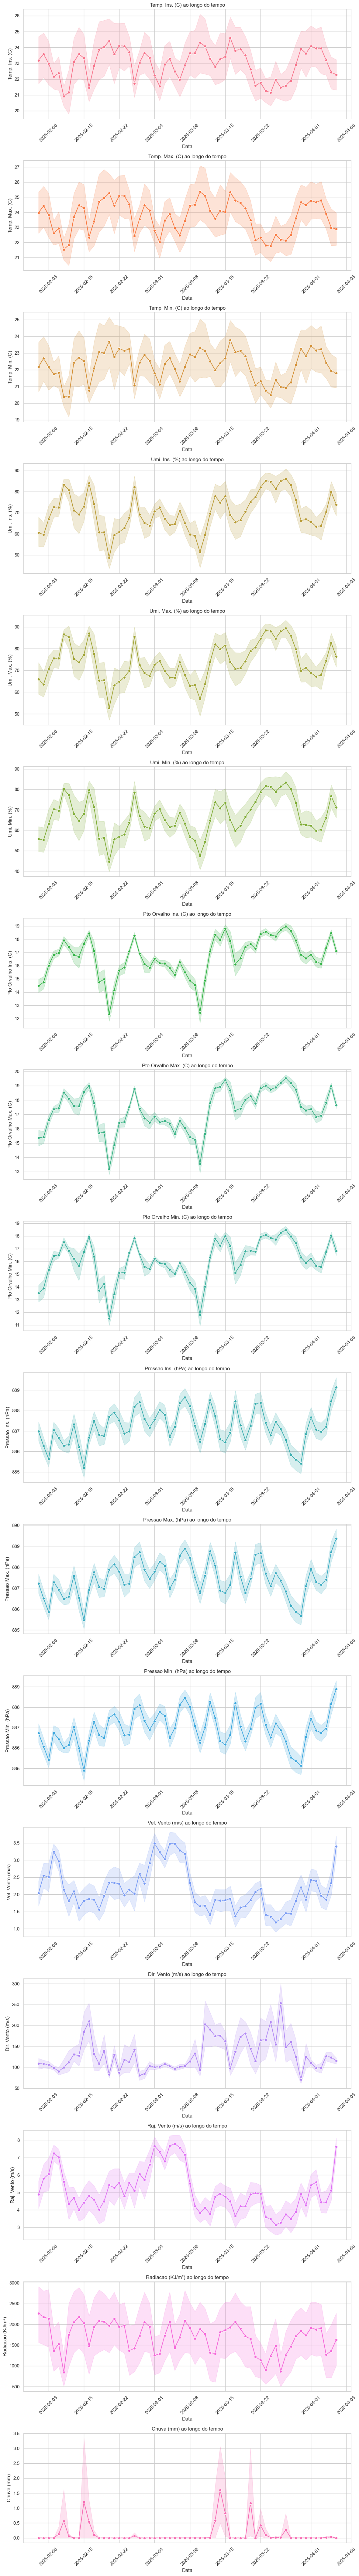

In [19]:
#plantando Tudo...
#configura o stylo do grafico
sns.set(style='whitegrid')
#cria uma paleta de cores com estilo 'husl', com uma cor diferente para cada coluna numericas
colors = sns.color_palette('husl', len(colunas_numericas))
#cria uma figura com varios subgrafico (subplots) dispostas em uma coluna (1 por linha).
#o figsize ajusta o tamanho da imagem final proporcionamente ao numero do grafico
fig, axes = plt.subplots(len(colunas_numericas), 1, figsize=(12, 5 * len(colunas_numericas)))


for i, col in enumerate(colunas_numericas):
    #gerando um grafico de linha (lineplot)para a variavel col ao longo da coluna de datas (dados_df)
    #usa um dos eixos (axes[i]) e aplica uma cor distinta
    #adicona marcador em cada ponto da linha (marker='o')
    sns.lineplot(x=dados_df['Data'], y=dados_df[col], ax=axes[i], color=colors[i], marker='o')
    #define o titulo e os rotulos dos eixos
    axes[i].set_title(f'{col} ao longo do tempo')
    axes[i].set_xlabel('Data')
    axes[i].set_ylabel(col)
    #Gera as ratulas do x para 45º para melhora a leitura
    axes[i].tick_params(axis='x', rotation=45)


#ajusta o layaut para evitar sobreposiçao
plt.tight_layout()

#mostra os graficos
plt.show()